In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import sys
import os
sys.path.append('/home/yutao4/Sat_Simulator')
os.chdir('/home/yutao4/Sat_Simulator')

In [2]:
sns.set_theme()
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 18

In [3]:
high_priority_ground_truth = pickle.load(open("data/high_priority_list.pkl", "rb"))

In [4]:
from loggingCode.overallLog import get_str

In [5]:
oec_ids=[x['imageName'] for x in get_str("log/forest/dgs_001/oec__9749496.log","Data Center Received data")]

In [6]:
default_ids=[x['imageName'] for x in get_str("log/forest/dgs_001/default_filter__9749496.log","Data Center Received data")]

In [7]:
oec_high_total=len([x for x in oec_ids if x in high_priority_ground_truth])
default_high_total=len([x for x in default_ids if x in high_priority_ground_truth])
oec_vessel_total=len([x for x in oec_ids if x in high_priority_ground_truth and 'vessel' in x])
default_vessel_total=len([x for x in default_ids if x in high_priority_ground_truth and 'vessel' in x])
oec_fire_total=oec_high_total-oec_vessel_total
default_fire_total=default_high_total-default_vessel_total

In [8]:
oec_high_total,oec_vessel_total,oec_fire_total,default_high_total,default_vessel_total,default_fire_total

(555, 538, 17, 654, 538, 116)

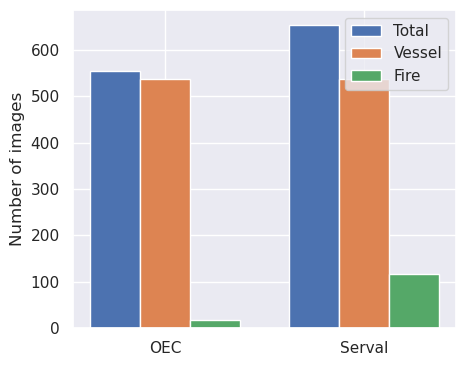

In [9]:
# Make a bar plot
fig, ax = plt.subplots(figsize=(5, 4))
width = 0.25
x = np.arange(2)
rects1 = ax.bar(x - width, [oec_high_total, default_high_total], width, label='Total')
rects2 = ax.bar(x, [oec_vessel_total, default_vessel_total], width, label='Vessel')
rects3 = ax.bar(x + width, [oec_fire_total, default_fire_total], width, label='Fire')
ax.set_ylabel('Number of images')
ax.set_xticks(x)
ax.set_xticklabels(['OEC', 'Serval'])
ax.legend()
fig.tight_layout()
plt.savefig('results/plots/oec.pdf')
plt.show()

In [14]:
gl=[x for x in high_priority_ground_truth if int(x[6:8])>=10]

In [16]:
len([x for x in gl if 'vessel' in x]), len([x for x in gl if 'vessel' not in x])

(538, 116)